*****************Question*********************

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

Since this is a classification probelem, we will go with Classification algorithms. 
Already we analyzed that dataset is balanced on the outcome (target variable), so we are not going to do any sampling.

FIrst we will do KNN prediction and find the maximum accuracy.

Next we will do below alogorithms and compare the score with KNN accuracy and prepare a final comparison table.

1. LOgistic Regression, 2. Decision Tree, 3. Random Forest, 4. Adaboost 5. Gradient Boost


In [131]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
data = pd.read_csv('health care diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From week1 task, re-doing the task --> REPLACE MISSING VALUES FOR 5 VARIABLES

In [6]:
data['Insulin'] = data['Insulin'].replace(to_replace=0,value=data['Insulin'].median())
data['BloodPressure'] = data['BloodPressure'].replace(to_replace=0,value=data['BloodPressure'].mean())
data['BMI'] = data['BMI'].replace(to_replace=0,value=data['BMI'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(to_replace=0,value=data['SkinThickness'].mean())
data['Glucose'] = data['Glucose'].replace(to_replace=0,value=data['Glucose'].mean())

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.0,43.1,2.288,33,1


In [8]:
data.shape

(768, 9)

In [10]:
X_features = data.drop(columns={'Outcome'})

In [11]:
X_features.shape

(768, 8)

In [12]:
Y_target = data.Outcome

In [13]:
Y_target.shape

(768,)

*********************START KNN PREDICTIONS*****************************

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X_features, Y_target, test_size=0.25, random_state=4)

Maximum accuracy:- 0.7760416666666666 at K = 3


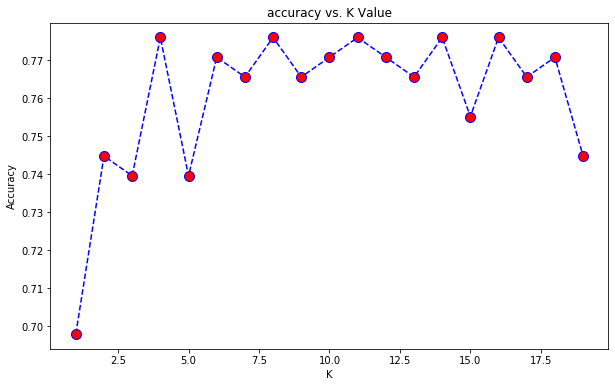

In [40]:
acc = []
from sklearn import metrics
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,20),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

********************START LOGISTIC REGRESSION*************************

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(X_features, Y_target, test_size = 0.25, random_state = 0)

In [42]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [43]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred = classifier.predict(xtest)

In [46]:
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.8020833333333334


*********************START ADABOOST*********************

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X_features, Y_target)

In [67]:
Adaclassifier = AdaBoostClassifier()

In [68]:
Adaclassifier.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [69]:
predictions = classifier.predict(x_test)

In [70]:
accuracy_score(predictions,y_test)

0.3541666666666667

************************START DECISION TREE****************

In [72]:
dt_clf = DecisionTreeClassifier()

In [73]:
dt_clf.fit(x_train,y_train)
predictions_dt = dt_clf.predict(x_test)
accuracy_score(predictions_dt,y_test)

0.703125

***************START GRADIENT BOOSTING*****************

In [76]:
gbm_clf = GradientBoostingClassifier()

In [77]:
gbm_clf.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [78]:
predictions_gbm = gbm_clf.predict(x_test)

In [79]:
accuracy_score(predictions_gbm,y_test)

0.7552083333333334

*******************START RANDOM FOREST*********************

In [81]:
# Random Forest Classification

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train,y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [82]:
predictions_rf = rf.predict(x_test)
accuracy_score(predictions_rf,y_test)

0.7760416666666666

In [101]:
final_pred ={'KNN': 0.77,'LOGISTIC': 0.80,'Adaboost': 0.30,'GradientBoost': 0.75,
                          'DecisionTree': 0.70,'RandomForest': 0.77}


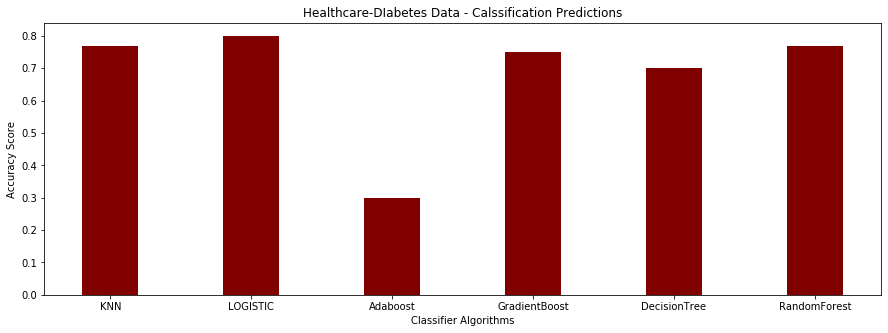

In [103]:
Algorithms = list(final_pred.keys())
Accuracy = list(final_pred.values())
  
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(Algorithms, Accuracy, color ='maroon',
        width = 0.4)
 
plt.xlabel("Classifier Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Healthcare-DIabetes Data - Calssification Predictions")
plt.show()

Logistic Regression leads the accuracy score followed by KNN and Random FOrest for the selected dataset without eliminating any of the feaure variables

*********************Question*********************

Project Task: Week 4

Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

I am choosing the Logic Regression model to calculate the confusion matrix, sensitivity, specificity,AUC -ROC Curve

In [110]:
print(classification_report(ytest, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



In [113]:

cm = confusion_matrix(ytest, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[118  12]
 [ 26  36]]


In [114]:
TP = cm[1,1] # This is True Positive, both actual and predicted are positive
TN = cm[0,0] # THis is True Negative, both actual and predicted are negative
FP = cm[1,0] # This is False Positive, Actual is Negative, but predicted as positive
FN = cm[0,1] # This is False Negative, Actual is Positive, but predicted as Negative


In [115]:
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

True Positive:  36
True Negative:  118
False Positive:  26
False Negative:  12


In [125]:
TPR = TP/(TP+FN) # TRUE POSITIVE RATE
TNR = TN/(TN+FP) # TRUE NEGATIVE RATE
FPR = FP/(TN+FP) # FALSE POSITIVE RATE

In [121]:
print("Sensitivity for the model is :",TPR)

Sensitivity for the model is : 0.75


In [124]:
print("Specificity for the model is :",TNR)

Specificity for the model is : 0.8194444444444444


In [126]:
fpr, tpr, threshold = metrics.roc_curve(ytest, y_pred)
roc_auc = metrics.auc(fpr, tpr)

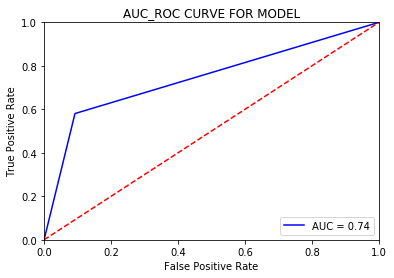

In [127]:
plt.title('AUC_ROC CURVE FOR MODEL')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()